# Curriculum Learning Analysis

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
import torch
from tqdm.notebook import tqdm
from copy import copy, deepcopy
import qiskit.quantum_info as qi
import cmath

from basis_gates import *
from agents import *
from environments import *
from models import *
%matplotlib inline

np.set_printoptions(precision = 3)

## FISC

In [9]:
logger1 = loader(data_path("two_qubits_HRC_Fisc_Curr_log.p"))
logger2 = loader(data_path("two_qubits_HRC_Fisc_noCurr_log.p"))

logger3 = loader(data_path("two_qubits_HRC_Fumc_Curr_log.p"))
logger4 = loader(data_path("two_qubits_HRC_Fumc_noCurr_log.p"))

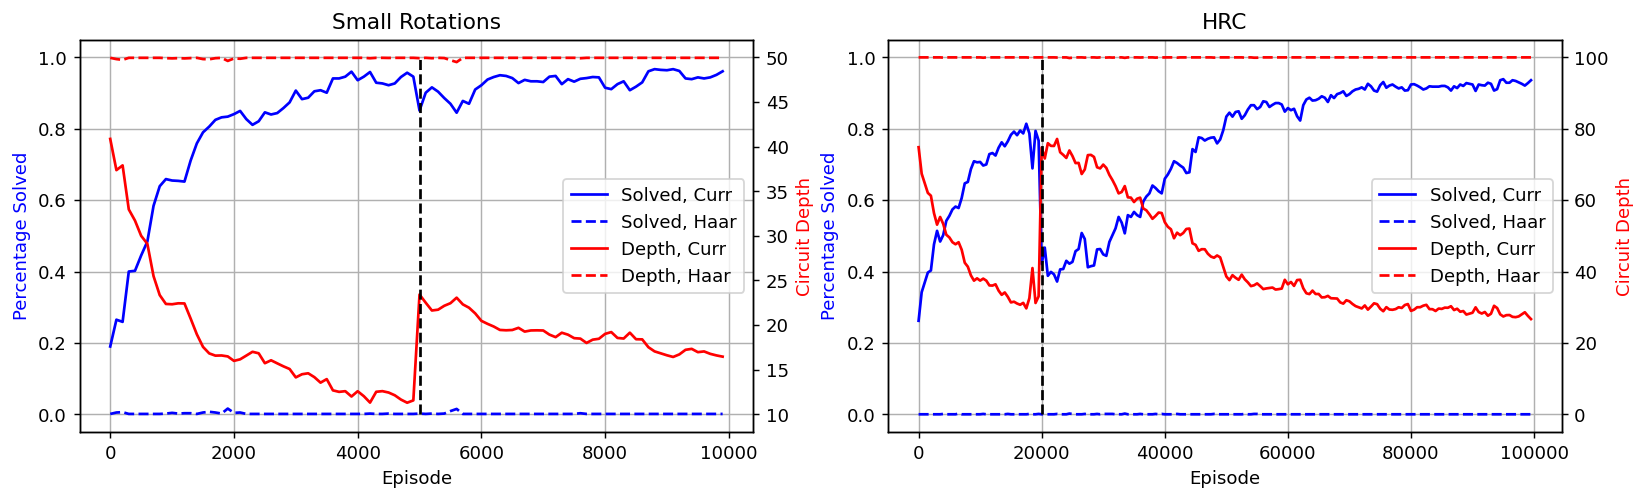

In [19]:
x1 = list(range(0, 10000, 100))
x2 = list(range(0, 100000, 500))

fig, (ax11, ax21) = plt.subplots(1, 2, dpi = 130, facecolor='w', edgecolor='k')
ax11.title.set_text('Small Rotations')
ax21.title.set_text('HRC')

ax12 = ax11.twinx()
ax22 = ax21.twinx()

#first plot
lns1 = ax11.plot(x1, logger1.solved, "b", label = "Solved, Curr")
lns2 = ax11.plot(x1, logger2.solved, "b--", label = "Solved, Haar")

lns3 = ax12.plot(x1, logger1.length, "r", label = "Depth, Curr")
lns4 = ax12.plot(x1, logger2.length, "r--", label = "Depth, Haar")
ax12.plot([5000, 5000], [10,50], "k--")

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
ax11.legend(lns, labs, loc="right")

ax11.set_xlabel("Episode")
ax11.set_ylabel("Percentage Solved", color='b')
ax12.set_ylabel("Circuit Depth", color='r')

ax11.grid()
#ax11.set_ylim([0.7, 1.01])
#ax12.set_ylim([0.5, 1.01])


#second plot
#lns1 = ax21.plot(x, len(logger1.fidelity)*[0.99], "k", label = "1 - $\delta$ = 0.99")
lns1 = ax21.plot(x2, logger3.solved, "b", label = "Solved, Curr")
lns2 = ax21.plot(x2, logger4.solved, "b--", label = "Solved, Haar")

lns3 = ax22.plot(x2, logger3.length, "r", label = "Depth, Curr")
lns4 = ax22.plot(x2, logger4.length, "r--", label = "Depth, Haar")
ax22.plot([20000, 20000], [0,100], "k--")

lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns]
ax21.legend(lns, labs, loc="right")

ax21.set_xlabel("Episode")
ax21.set_ylabel("Percentage Solved", color='b')
ax22.set_ylabel("Circuit Depth", color='r')

ax21.grid()

ax11.set_ylim([-0.05, 1.05])
ax21.set_ylim([-0.05, 1.05])


plt.subplots_adjust(left = -1, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.savefig(image_path("two_qubit_HRC_curriculum.pdf"), bbox_inches='tight')

plt.show()

## Haar Measure Unitary Neighborhood

In [56]:
N = 10*200000000

count_list = loader(data_path(f"Haar_neighborhoods_{9}.p"))
count_list.insert(0, 10*count_list[0])
density = N/np.array(count_list)

In [57]:
logger1 = loader(data_path("two_qubits_HRC_Fumc_Curr_65_final.log"))
logger2 = loader(data_path("two_qubits_HRC_Fumc_Curr_70_final.log"))
logger3 = loader(data_path("two_qubits_HRC_Fumc_Curr_75_final.log"))
logger4 = loader(data_path("two_qubits_HRC_Fumc_Curr_80_final.log"))
logger5 = loader(data_path("two_qubits_HRC_Fumc_Curr_85_final.log"))
logger6 = loader(data_path("two_qubits_HRC_Fumc_Curr_90_1.log"))

In [58]:
y1 = np.argmax((np.array(logger1.solved)>=0.97))
y2 = np.argmax((np.array(logger2.solved)>=0.97))
y3 = np.argmax((np.array(logger3.solved)>=0.97))
y4 = np.argmax((np.array(logger4.solved)>=0.97))
y5 = np.argmax((np.array(logger5.solved)>=0.97))
y6 = 150
y= [y1, y2, y3, y4, y5, y6]

In [59]:
print(density)

[3.630e+03 3.630e+04 1.651e+05 1.015e+06 1.143e+07 4.000e+08]


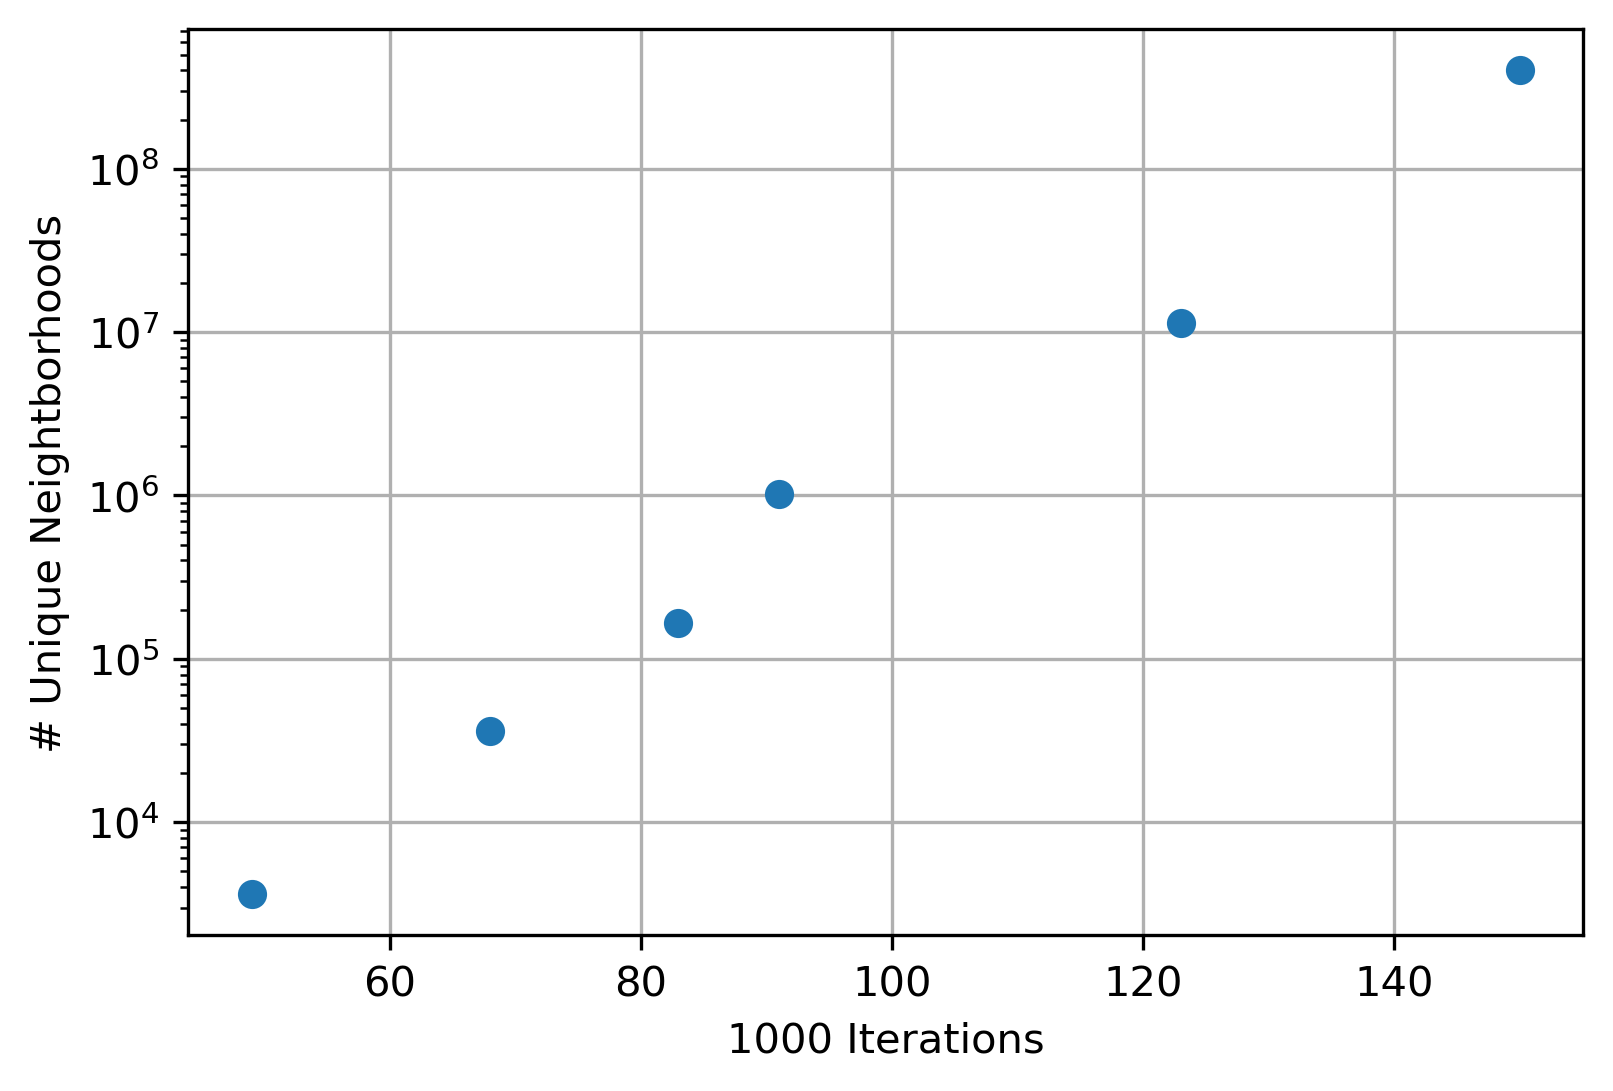

In [62]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(y, density, 'o')
plt.yscale("log")
plt.xlabel("1000 Iterations")
plt.ylabel("# Unique Neightborhoods")
plt.grid()
plt.show()

In [25]:
print(y)

[68, 88, 91, 0]


In [26]:
logger4.solved

[0.337,
 0.42,
 0.449,
 0.524,
 0.551,
 0.578,
 0.596,
 0.628,
 0.633,
 0.644,
 0.63,
 0.647,
 0.65,
 0.67,
 0.677,
 0.689,
 0.707,
 0.726,
 0.729,
 0.724,
 0.739,
 0.74,
 0.718,
 0.73,
 0.73,
 0.748,
 0.755,
 0.75,
 0.747,
 0.757,
 0.766,
 0.757,
 0.762,
 0.758,
 0.793,
 0.776,
 0.778,
 0.78,
 0.766,
 0.787,
 0.782,
 0.779,
 0.773,
 0.782,
 0.804,
 0.807,
 0.791,
 0.801,
 0.81,
 0.812,
 0.303,
 0.426,
 0.473,
 0.489,
 0.555,
 0.571,
 0.594,
 0.63,
 0.651,
 0.716,
 0.701,
 0.721,
 0.754,
 0.717,
 0.722,
 0.736,
 0.765,
 0.75,
 0.755,
 0.781,
 0.788,
 0.83,
 0.807,
 0.829,
 0.834,
 0.873,
 0.879,
 0.873,
 0.884,
 0.892,
 0.92,
 0.902,
 0.885,
 0.894,
 0.924,
 0.928,
 0.929,
 0.924,
 0.936,
 0.935,
 0.926,
 0.944,
 0.945,
 0.947,
 0.951,
 0.936,
 0.951,
 0.944,
 0.94,
 0.936,
 0.935,
 0.954,
 0.927,
 0.932,
 0.941,
 0.948,
 0.949,
 0.949,
 0.951,
 0.931,
 0.954,
 0.959,
 0.959,
 0.963,
 0.948,
 0.957,
 0.952,
 0.967,
 0.968,
 0.957,
 0.966,
 0.958,
 0.957,
 0.97,
 0.958,
 0.965,
 0.966,
